# Day 1

We calculate the log(likelihood) on each gridding point of (mean(vr), dispersion(vr)) 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [4]:
data_path = '../Materials/data/'

In [5]:
df = pd.read_csv(data_path+'Cas3_total.csv')


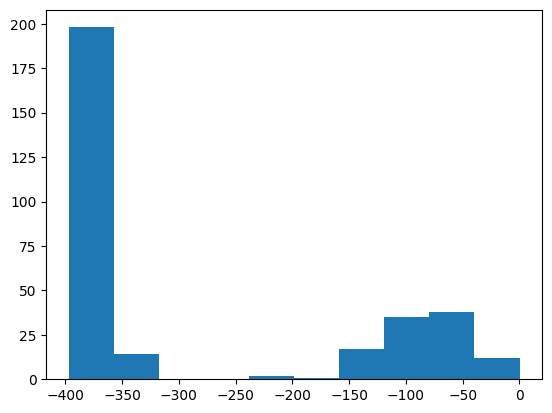

In [6]:
plt.figure()
plt.hist(df['vr']);

In [7]:
ind_dg = df['vr'] <= -300


In [8]:
dg = df[ind_dg]
vr_cas3 = np.array(dg['vr'])
print (len(vr_cas3))

212


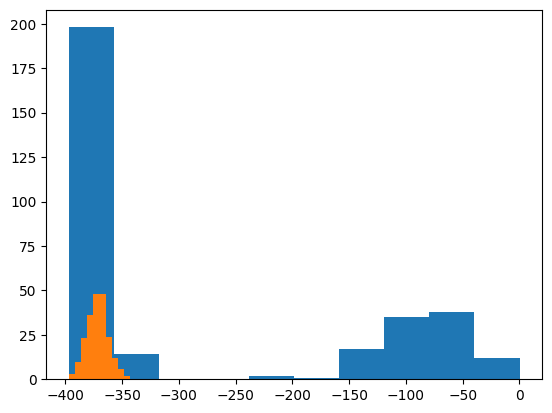

In [9]:
plt.figure()
plt.hist(df['vr']);
plt.hist(dg['vr']);

In [10]:
# Now let's create a grid of 50x50 points in the range of -380 to -360 for mvr and 7 to 12 for dvr
mvr_grid = np.array(np.arange(-380, -360, .4))
dvr_grid = np.array(np.arange(7, 12, 0.1))

In [11]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood(mu, sigma, x):

    
    logL = -np.log(sigma * np.sqrt(2 * np.pi)) - ((x - mu)**2) / (2 * sigma**2)

    return logL

In [149]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood1(mvr, dvr, vr_dg):

    logL = np.log(1/(dvr * np.sqrt(2 * np.pi))*np.exp(-0.5*((vr_dg - mvr)/dvr)**2))

    return logL

In [150]:
# Then we crate a 2D array (matrix) to store the log(L) for each pair of (mean(vr), dispersion(vr)). The default value is 0.
logL_grid = np.zeros((len(mvr_grid), len(dvr_grid)))
print (logL_grid.shape)


(50, 50)


In [163]:
# We now can calculate the log(L) for each gridding point
for i in range(logL_grid.shape[0]):
    for j in range(logL_grid.shape[1]):
        logL_grid[i, j] = log_Likilihood(mvr_grid[i], dvr_grid[j], vr_cas3)

print (logL_grid)

[[-963.01685941 -956.07571392]
 [-948.65049207 -942.11118307]
 [-934.97636962 -928.81953459]]


In [12]:
print("Shapes:")
print("mvr_grid:", mvr_grid.shape)  # Should be (M,)
print("dvr_grid:", dvr_grid.shape)  # Should be (N,)
print("vr_cas3:", vr_cas3.shape)    # Should be (10,)

Shapes:
mvr_grid: (50,)
dvr_grid: (50,)
vr_cas3: (212,)


In [13]:
# or we can use the braodcasting feature of numpy to calculate the log(L) for all gridding points at once
logL_grid = log_Likelihood(mvr_grid[:, np.newaxis, np.newaxis], dvr_grid[np.newaxis, :, np.newaxis], vr_cas3[np.newaxis, np.newaxis, :] )

TypeError: Input z must be 2D, not 3D

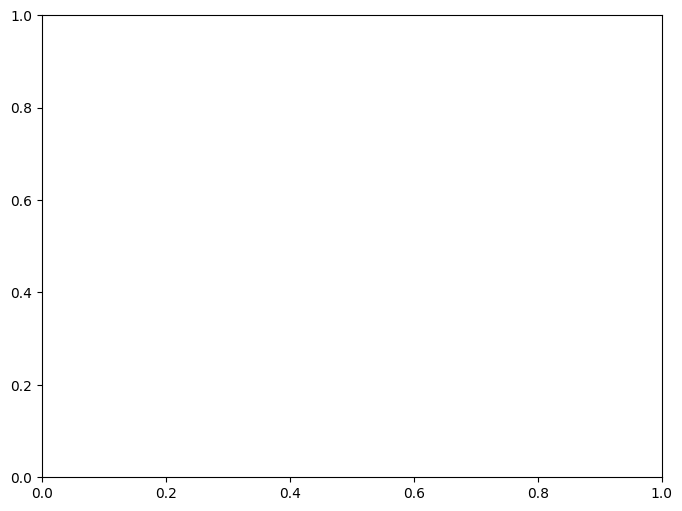

In [16]:
# Here comes to the visualizations!
# Note that when we plot in contour and imshow, the 2D array need to be inverted !!
# This is the contour plot of logL, whic does not make too much senses

plt.figure(figsize=(8, 6))
contour = plt.contour(mvr_grid, dvr_grid, logL_grid.T)
plt.colorbar(contour)  # Add colorbar
plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()

In [114]:
# Let's get the likelihood values instead! 
# In order to do that, we need to the maximum likelihood vaues, as well as parameters that give the maximum likelihood
print (np.max(logL_grid))

max_indices = np.where(logL_grid == np.max(logL_grid))
max_row, max_col = max_indices[0][0], max_indices[1][0]

print (max_row, max_col)
print(mvr_grid[max_row], dvr_grid[max_col])

-780.2981773394497
21 26
-371.6000000000005 9.59999999999999


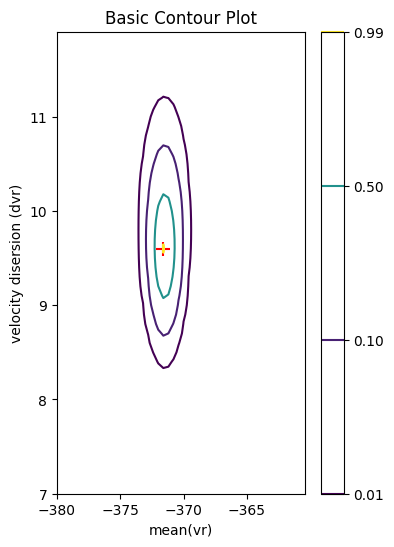

In [133]:
# This is the contour plot of Likelihood, we want it to be normalized to the maximum value
levels = np.array([0.01, 0.1, 0.5, 0.99])
plt.figure(figsize=(4, 6))
contour = plt.contour(mvr_grid, dvr_grid, np.exp(logL_grid.T-np.max(logL_grid)), levels=levels)
plt.scatter(mvr_grid[max_row], dvr_grid[max_col], marker="+", color='red', s=100)
cbar = plt.colorbar(contour)  # Add colorbar

plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()